In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier


In [43]:
df=pd.read_csv("/content/drive/MyDrive/app_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df=df.iloc[100000:300000,:]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
100000,216091,0,Cash loans,F,Y,Y,0,135000.0,270000.0,18112.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
100001,216092,0,Revolving loans,F,Y,Y,1,1125000.0,1350000.0,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100002,216093,0,Cash loans,F,N,Y,2,112500.0,291384.0,23490.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
100003,216094,0,Cash loans,F,N,N,0,112500.0,835380.0,40189.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100004,216095,0,Cash loans,F,Y,Y,0,112500.0,765261.0,32422.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,447541,0,Cash loans,M,Y,Y,1,279000.0,1256400.0,40657.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
299996,447542,0,Cash loans,F,N,Y,0,90000.0,513531.0,21888.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
299997,447544,0,Cash loans,F,N,Y,0,112500.0,521280.0,27423.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
299998,447545,0,Cash loans,F,Y,N,0,135000.0,392427.0,14224.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Descriptive statistic

In [45]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,199995.000000,1.998130e+05,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,172928.000000,172928.000000,172928.000000,172928.000000,172928.000000,172928.000000
mean,331742.892890,0.080715,0.416465,1.685456e+05,5.992271e+05,27125.150874,5.385793e+05,0.020882,-16040.724130,63987.073250,...,0.008025,0.000560,0.000505,0.000355,0.006297,0.006887,0.034511,0.266452,0.265295,1.903925
std,66792.820259,0.272398,0.722665,1.122081e+05,4.030537e+05,14518.467312,3.697976e+05,0.013839,4361.786469,141419.136612,...,0.089222,0.023658,0.022467,0.018838,0.083030,0.112762,0.205152,0.909844,0.875710,1.865559
min,216091.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,273888.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16564.500000,2.385000e+05,0.010006,-19686.250000,-2762.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,331850.500000,0.000000,0.000000,1.485000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15752.000000,-1210.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,389257.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34605.000000,6.795000e+05,0.028663,-12425.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,447547.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,21.000000


# missing value

In [46]:
#check missing value 
%matplotlib inline

def missing_values(data, thresh = 50, color = 'black', edgecolor = 'black', height = 5, width = 25):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

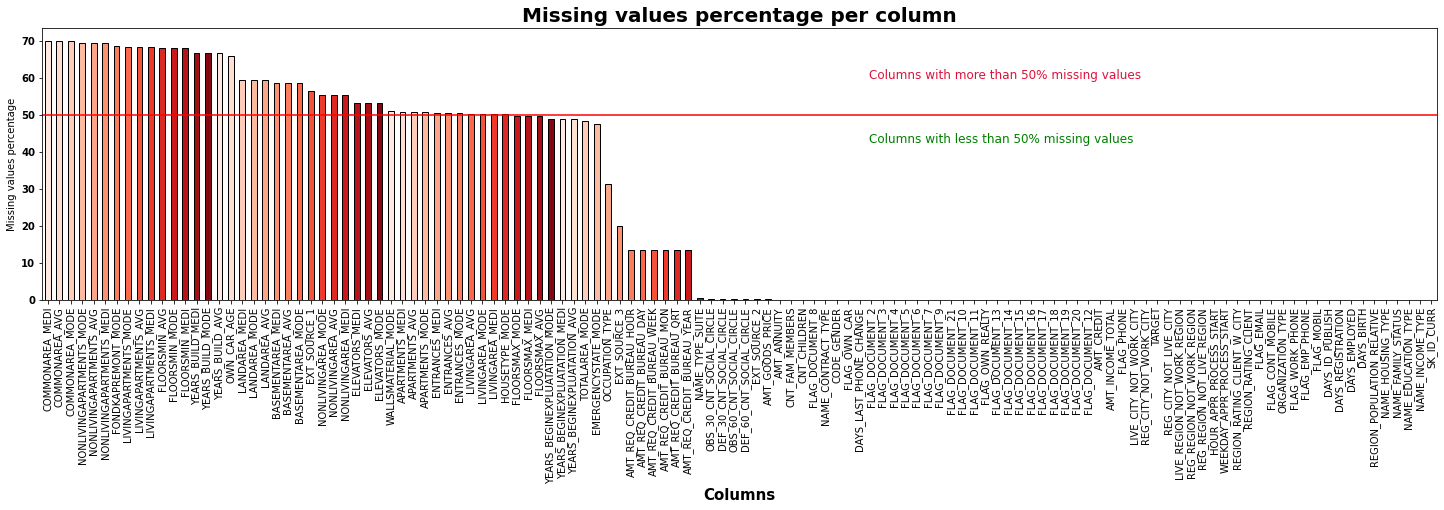

In [47]:
missing_values(df, thresh = 50, color = sns.color_palette('Reds',15))

In [48]:
def null_perc(df):
    null_perc=round(((df.isna().sum()/len(df))*100),2)
    return null_perc

In [49]:
null_perc(df)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.54
AMT_REQ_CREDIT_BUREAU_WEEK    13.54
AMT_REQ_CREDIT_BUREAU_MON     13.54
AMT_REQ_CREDIT_BUREAU_QRT     13.54
AMT_REQ_CREDIT_BUREAU_YEAR    13.54
Length: 122, dtype: float64

In [50]:
appl_col=df.columns
null_perc_cols=null_perc(df)
null_perc_cols[(null_perc_cols>50)==True].count()

41

In [51]:
null_perc_50=(null_perc_cols[(null_perc_cols>50)==True]).index

In [52]:
df.drop(columns=null_perc_50,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
cate = [col for col in df.columns if df[col].dtypes == "object"]
cate

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [54]:
num = [col for col in df.columns if df[col].dtypes != "object"]
num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [55]:
for i in cate:
  df[i]=df[i].fillna(df[i].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
for i in num:
  df[i]=df[i].fillna(df[i].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

# Insight

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

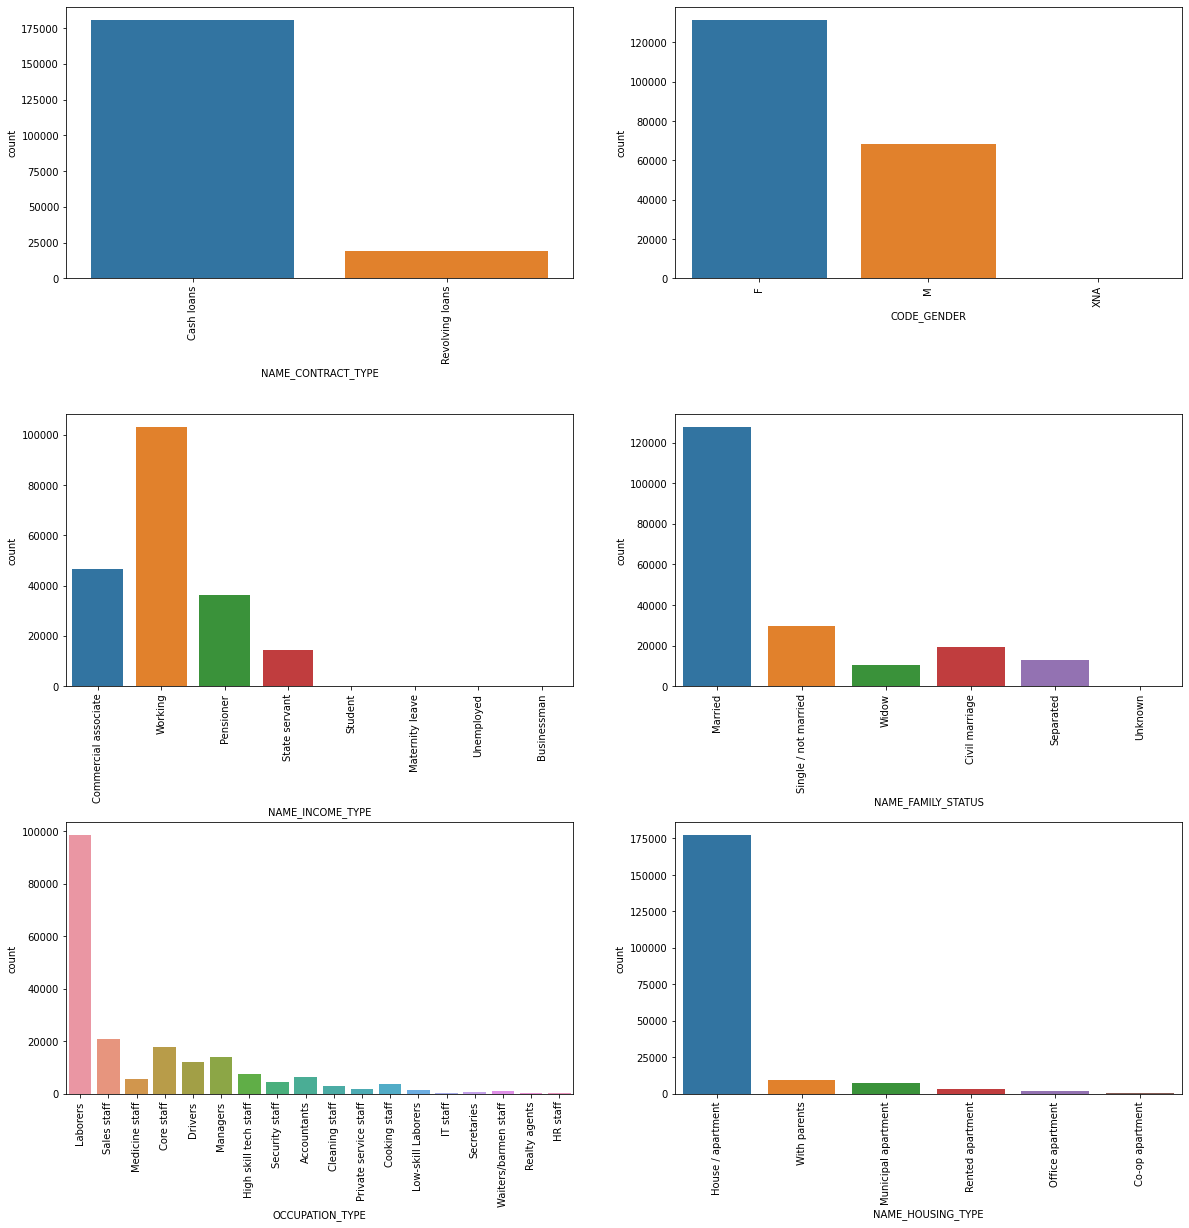

In [58]:
CatUnOrList = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE']
plt.figure(figsize=[20,20])
for i in range(len(CatUnOrList)):
    plt.subplot(3,2, i+1)
    sns.countplot(df[CatUnOrList[i]])
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

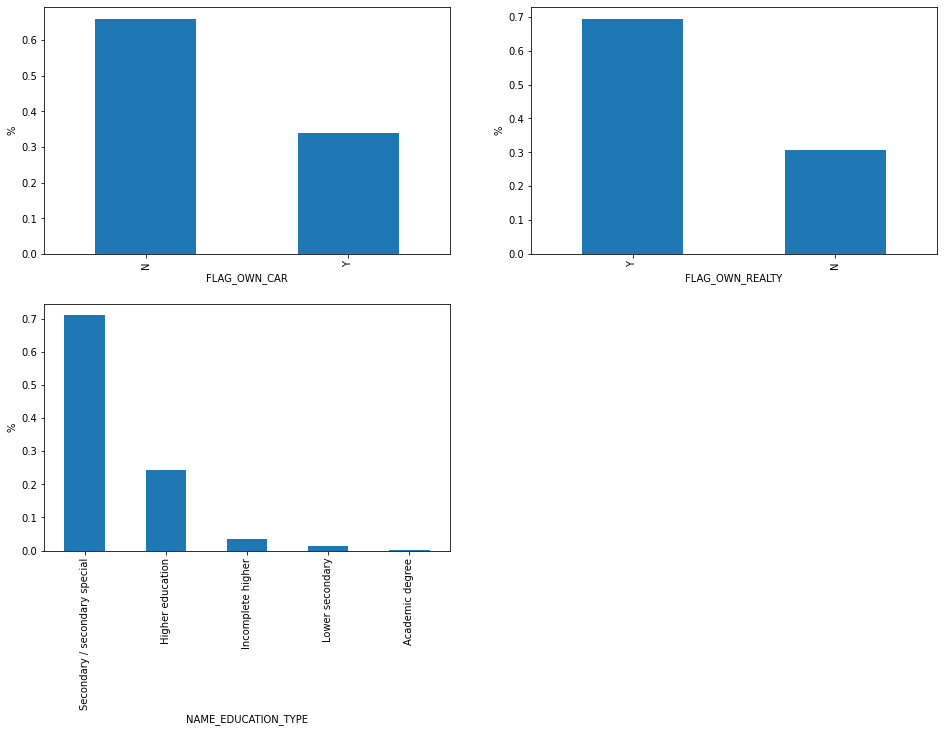

In [59]:
CatOrList = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE']
plt.figure(figsize=[16,10])
for i in range(len(CatOrList)):
    plt.subplot(2,2, i+1)
    df[CatOrList[i]].value_counts(normalize=True).plot(kind='bar',stacked=True)
    plt.subplots_adjust(hspace=0.2)
    plt.xlabel(CatOrList[i])
    plt.ylabel('%')
    plt.xticks(rotation=90)

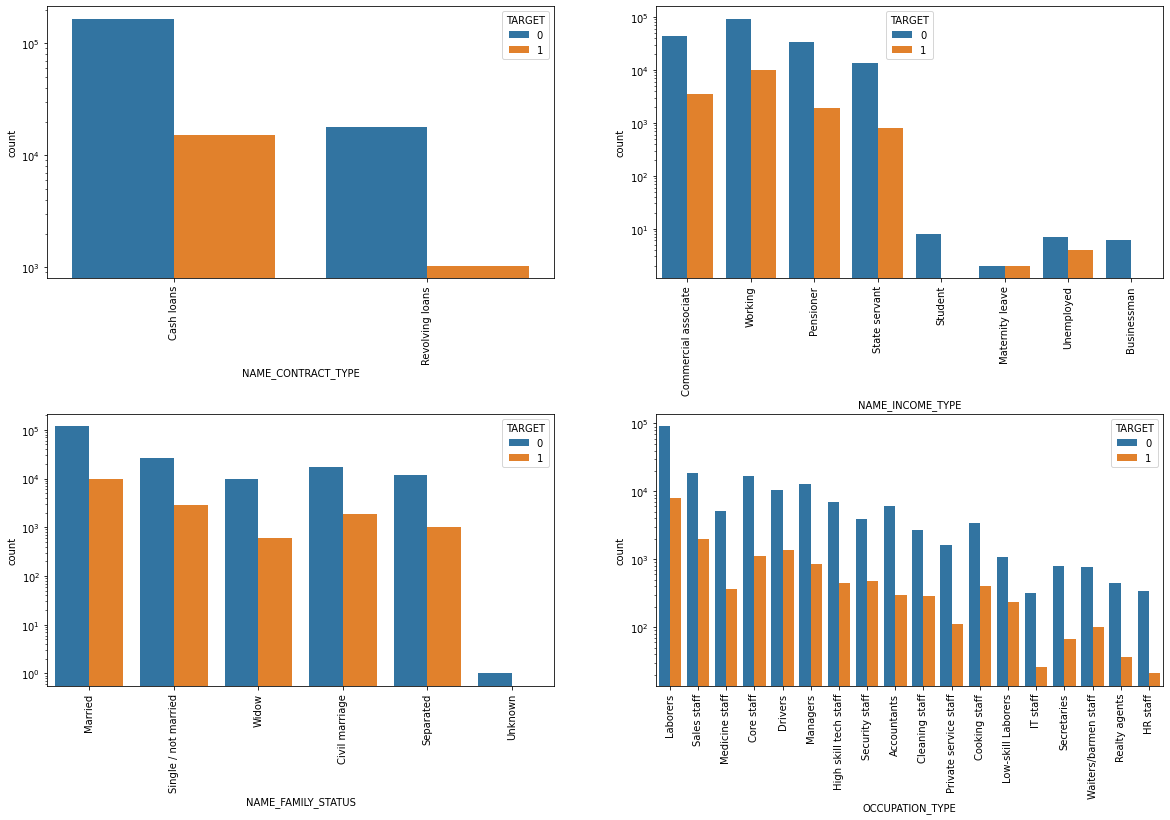

In [60]:
CatUnOrList = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
plt.figure(figsize=[20,20])
for i in range(len(CatUnOrList)):
    plt.subplot(3,2, i+1)
    plt.yscale('log')
    sns.countplot(data=df, x=CatUnOrList[i], hue='TARGET')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

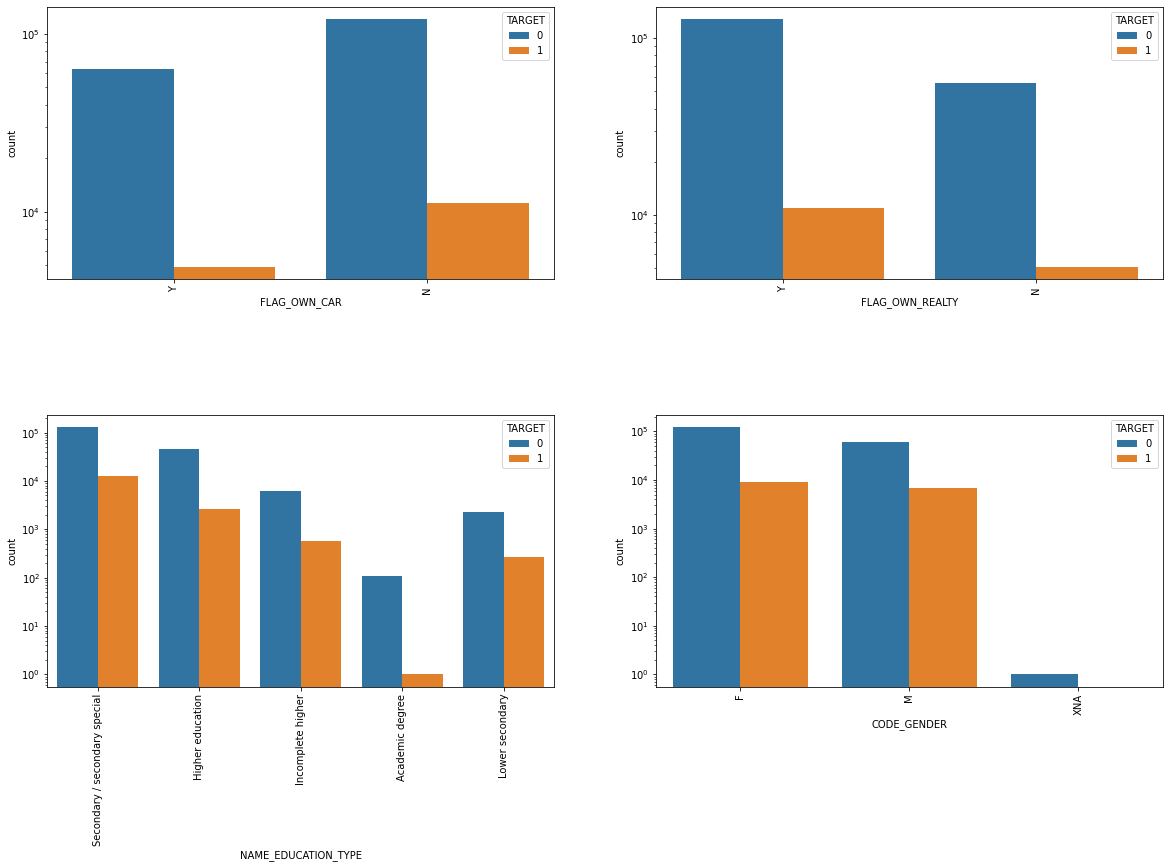

In [61]:
# Ordered vs Ordered
CatOrList = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']
plt.figure(figsize=[20,20])
for i in range(len(CatOrList)):
    plt.subplot(3,2, i+1)
    plt.yscale('log')
    sns.countplot(data=df, x=CatOrList[i], hue='TARGET')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

# encoding

In [62]:
cate

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [63]:
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0,'Revolving loans': 1})
df['CODE_GENDER'] = df['CODE_GENDER'].replace({'M': 0,'F': 1})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace({'N': 0,'Y': 1})
df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].replace({'N': 0,'Y': 1})
df["WEEKDAY_APPR_PROCESS_START"]=df["WEEKDAY_APPR_PROCESS_START"].replace({'WEDNESDAY':4, 'MONDAY':2, 'THURSDAY':3, 'SUNDAY':8, 'SATURDAY':7, 'FRIDAY':6,'TUESDAY':3})
col = ['ORGANIZATION_TYPE','OCCUPATION_TYPE',"EMERGENCYSTATE_MODE"]
df.drop(col, inplace=True, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [64]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
100000,216091,0,0,1,1,1,0,135000.0,270000.0,18112.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
100001,216092,0,1,1,1,1,1,1125000.0,1350000.0,67500.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100002,216093,0,0,1,0,1,2,112500.0,291384.0,23490.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
100003,216094,0,0,1,0,0,0,112500.0,835380.0,40189.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
100004,216095,0,0,1,1,1,0,112500.0,765261.0,32422.5,...,0,0,0,0,0.006297,0.006887,0.034511,0.266452,0.265295,1.903925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,447541,0,0,0,1,1,1,279000.0,1256400.0,40657.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
299996,447542,0,0,1,0,1,0,90000.0,513531.0,21888.0,...,0,0,0,0,0.006297,0.006887,0.034511,0.266452,0.265295,1.903925
299997,447544,0,0,1,0,1,0,112500.0,521280.0,27423.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
299998,447545,0,0,1,1,0,0,135000.0,392427.0,14224.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


# correlation

In [65]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                            SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  \
SK_ID_CURR                    1.000000  0.004231            0.001822   
TARGET                        0.004231  1.000000            0.031559   
NAME_CONTRACT_TYPE            0.001822  0.031559            1.000000   
FLAG_OWN_CAR                  0.002570  0.022797            0.005348   
FLAG_OWN_REALTY               0.000507  0.006673            0.066736   
...                                ...       ...                 ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000555  0.001076            0.005498   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000221  0.000700            0.015664   
AMT_REQ_CREDIT_BUREAU_MON     0.003420  0.011774            0.012567   
AMT_REQ_CREDIT_BUREAU_QRT     0.002151  0.000637            0.018100   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004123  0.018891            0.048050   

                            FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                      0.002570         0.000507   

In [66]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                            SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  \
SK_ID_CURR                         NaN  0.004231            0.001822   
TARGET                             NaN       NaN            0.031559   
NAME_CONTRACT_TYPE                 NaN       NaN                 NaN   
FLAG_OWN_CAR                       NaN       NaN                 NaN   
FLAG_OWN_REALTY                    NaN       NaN                 NaN   
...                                ...       ...                 ...   
AMT_REQ_CREDIT_BUREAU_DAY          NaN       NaN                 NaN   
AMT_REQ_CREDIT_BUREAU_WEEK         NaN       NaN                 NaN   
AMT_REQ_CREDIT_BUREAU_MON          NaN       NaN                 NaN   
AMT_REQ_CREDIT_BUREAU_QRT          NaN       NaN                 NaN   
AMT_REQ_CREDIT_BUREAU_YEAR         NaN       NaN                 NaN   

                            FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                      0.002570         0.000507   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [67]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(); print(to_drop)



['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [68]:
df.drop(to_drop, inplace=True, axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
100000,216091,0,0,1,1,1,0,135000.0,270000.0,18112.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
100001,216092,0,1,1,1,1,1,1125000.0,1350000.0,67500.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100002,216093,0,0,1,0,1,2,112500.0,291384.0,23490.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
100003,216094,0,0,1,0,0,0,112500.0,835380.0,40189.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
100004,216095,0,0,1,1,1,0,112500.0,765261.0,32422.5,...,0,0,0,0,0.006297,0.006887,0.034511,0.266452,0.265295,1.903925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,447541,0,0,0,1,1,1,279000.0,1256400.0,40657.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
299996,447542,0,0,1,0,1,0,90000.0,513531.0,21888.0,...,0,0,0,0,0.006297,0.006887,0.034511,0.266452,0.265295,1.903925
299997,447544,0,0,1,0,1,0,112500.0,521280.0,27423.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
299998,447545,0,0,1,1,0,0,135000.0,392427.0,14224.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


#modeling

In [70]:
df["TARGET"]. value_counts(normalize=True) #imbalance data 

0    0.919285
1    0.080715
Name: TARGET, dtype: float64

In [71]:
#oversampling 
ros= RandomOverSampler()
df_dummy=pd.get_dummies(df, drop_first=True)
X= df_dummy.drop(["TARGET"],axis=1)
y=df["TARGET"]
x_ros, y_ros= ros.fit_resample(X,y)
x_ros.shape, y_ros.shape

((367714, 88), (367714,))

In [72]:
x_ros

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,216091,0,1,1,0,135000.0,270000.0,18112.5,0.026392,-20807,...,1,0,0,0,0,1,0,0,0,0
1,216092,1,1,1,1,1125000.0,1350000.0,67500.0,0.072508,-14325,...,0,0,1,0,0,1,0,0,0,0
2,216093,0,0,1,2,112500.0,291384.0,23490.0,0.009549,-10483,...,1,0,0,0,0,0,0,0,0,1
3,216094,0,0,0,0,112500.0,835380.0,40189.5,0.008230,-17547,...,1,0,0,0,0,1,0,0,0,0
4,216095,0,1,1,0,112500.0,765261.0,32422.5,0.030755,-20790,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367709,424338,0,1,1,1,135000.0,450000.0,22018.5,0.016612,-14737,...,1,0,0,0,0,1,0,0,0,0
367710,424504,0,0,0,2,157500.0,238500.0,15385.5,0.006296,-10554,...,1,0,0,0,0,0,0,0,0,1
367711,372012,0,1,1,3,202500.0,490536.0,23989.5,0.020246,-12893,...,1,0,0,0,0,1,0,0,0,0
367712,439332,0,0,1,0,153000.0,808650.0,31333.5,0.018850,-10227,...,0,0,1,0,0,1,0,0,0,0


In [73]:
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x_ros, y_ros, test_size= 0.3, random_state = 42)
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [75]:
def roc(model):
  y_score1 = model.predict_proba(X_test)[:,1]
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
  print('roc_auc_score : ', roc_auc_score(Y_test, y_score1))
  plt.subplots(1, figsize=(10,10))
  plt.title('Receiver Operating Characteristic')
  plt.plot(false_positive_rate1, true_positive_rate1)
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return None

In [76]:
#Logistic Regression
model= LogisticRegression()
model=model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
print_scores(Y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.67      0.69      0.68     55304
           1       0.68      0.66      0.67     55011

    accuracy                           0.67    110315
   macro avg       0.67      0.67      0.67    110315
weighted avg       0.67      0.67      0.67    110315



roc_auc_score :  0.7380339125552321


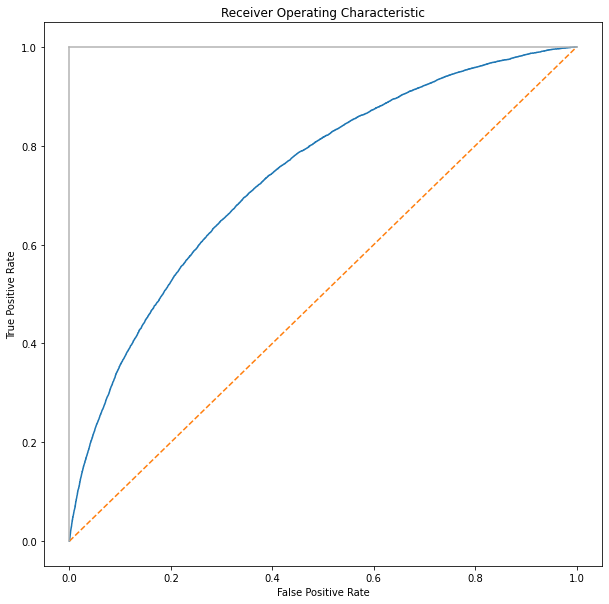

In [77]:
roc(model)

In [78]:
#decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=25)
decision_tree.fit(X_train, Y_train)
y_pred_1=decision_tree.predict(X_test)
print_scores(Y_test, y_pred_1)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     55304
           1       0.86      1.00      0.92     55011

    accuracy                           0.92    110315
   macro avg       0.93      0.92      0.92    110315
weighted avg       0.93      0.92      0.92    110315



roc_auc_score :  0.9344946608432216


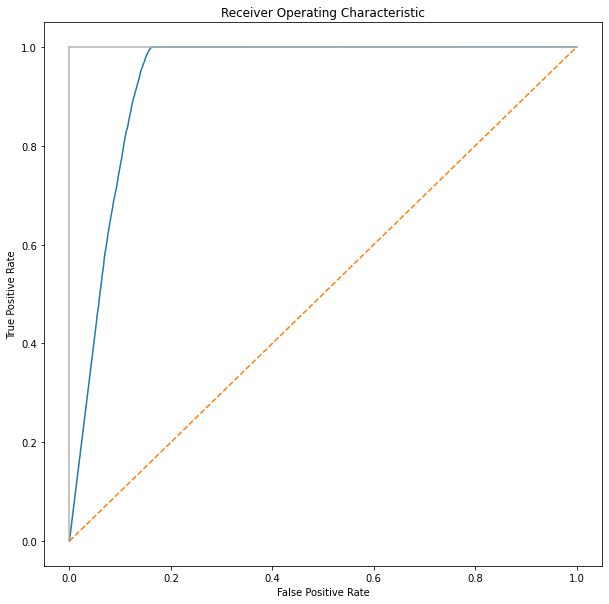

In [79]:
roc(decision_tree)

In [80]:
#Random Forest
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, Y_train)
y_pred_2=clf.predict(X_test)
print_scores(Y_test, y_pred_2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55304
           1       0.97      1.00      0.98     55011

    accuracy                           0.98    110315
   macro avg       0.99      0.98      0.98    110315
weighted avg       0.99      0.98      0.98    110315



roc_auc_score :  0.9999121541234933


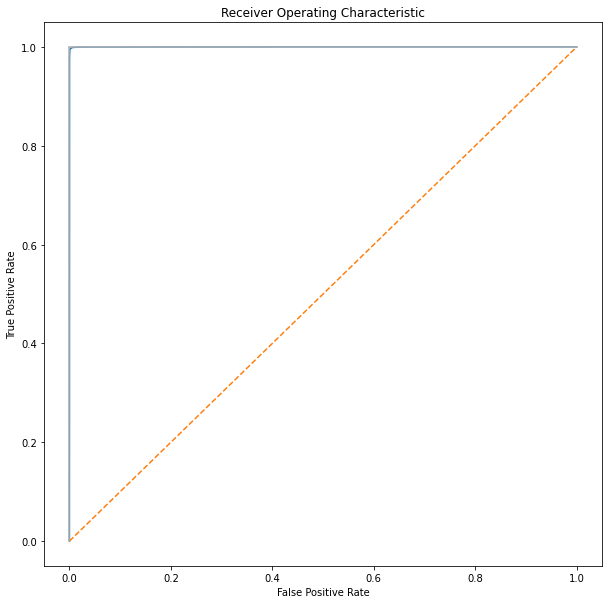

In [81]:
roc(clf)